# Inventory Optimization Dashboard (CSV-Based)

This notebook loads pre-exported views and tables from `.csv` files to analyze and visualize key metrics.

In [46]:
# Step 1: Load required libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure inline plotting
%matplotlib inline

In [47]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setting visuals
sns.set(style="whitegrid")

# Load all datasets (make sure the path is correct)
try:
    fact_inventory = pd.read_csv("../exports/fact_inventory.csv")
    vw_inventory_gap = pd.read_csv("../exports/vw_inventory_gap.csv")
    vw_low_accuracy_stores = pd.read_csv("../exports/vw_low_accuracy_stores.csv")
    vw_days_inventory_left = pd.read_csv("../exports/vw_days_inventory_left.csv")
    print("✅ All CSVs loaded successfully!")
except Exception as e:
    print(f"❌ Error loading files: {e}")

✅ All CSVs loaded successfully!


In [48]:
#Loading CSV files
fact_inventory = pd.read_csv("../exports/fact_inventory.csv")
vw_inventory_gap = pd.read_csv("../exports/vw_inventory_gap.csv")
vw_low_accuracy_stores = pd.read_csv("../exports/vw_low_accuracy_stores.csv")
vw_days_inventory_left = pd.read_csv("../exports/vw_days_inventory_left.csv")

In [49]:
#Fix incorrect delimiter by specifying it explicitly
vw_inventory_gap = pd.read_csv("../exports/vw_inventory_gap.csv", delimiter=';')

In [50]:
print(vw_inventory_gap.columns)

Index(['product_id', 'store_id', 'avg_inventory', 'avg_demand',
       'inventory_gap'],
      dtype='object')


## 1. Average Inventory Gap by Store

In [51]:
fig = px.bar(
    vw_inventory_gap,
    x='store_id',
    y='inventory_gap',
    title='Average Inventory Gap by Store',
    labels={'store_id': 'Store ID', 'inventory_gap': 'Avg Inventory Gap'}
)
fig.show()

In [52]:
with open("../exports/inventory_forecasting(1).csv", 'r') as f:
    first_line = f.readline()
    print(first_line)

Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality



In [53]:
import pandas as pd

fact_inventory = pd.read_csv("../exports/inventory_forecasting(1).csv", delimiter=',')  # or just remove delimiter= (default is ',')

In [54]:
print(fact_inventory.columns.tolist())

['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing', 'Seasonality']


In [55]:
fact_inventory.columns = fact_inventory.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')

## 2. Top 10 Stores by Forecast Errors

In [56]:
# Create a fallback chart for forecast error by store
fallback = fact_inventory.copy()
fallback['forecast_error'] = abs(fallback['demand_forecast'] - fallback['units_sold'])

by_store = fallback.groupby('store_id')['forecast_error'].mean().reset_index()

import plotly.express as px
fig = px.bar(
    by_store.sort_values(by='forecast_error', ascending=False).head(10),
    x='store_id',
    y='forecast_error',
    title='Top 10 Stores by Forecast Error',
    labels={'store_id': 'Store ID', 'forecast_error': 'Avg Forecast Error'},
    color='forecast_error',
    color_continuous_scale='OrRd'
)
fig.show()

In [57]:
vw_days_inventory_left = pd.read_csv("../exports/vw_days_inventory_left.csv", delimiter=';')

In [58]:
print(vw_days_inventory_left.columns)

Index(['store_id', 'product_id', 'days_inventory_left'], dtype='object')


## 3. Days Inventory Left per Store/Product

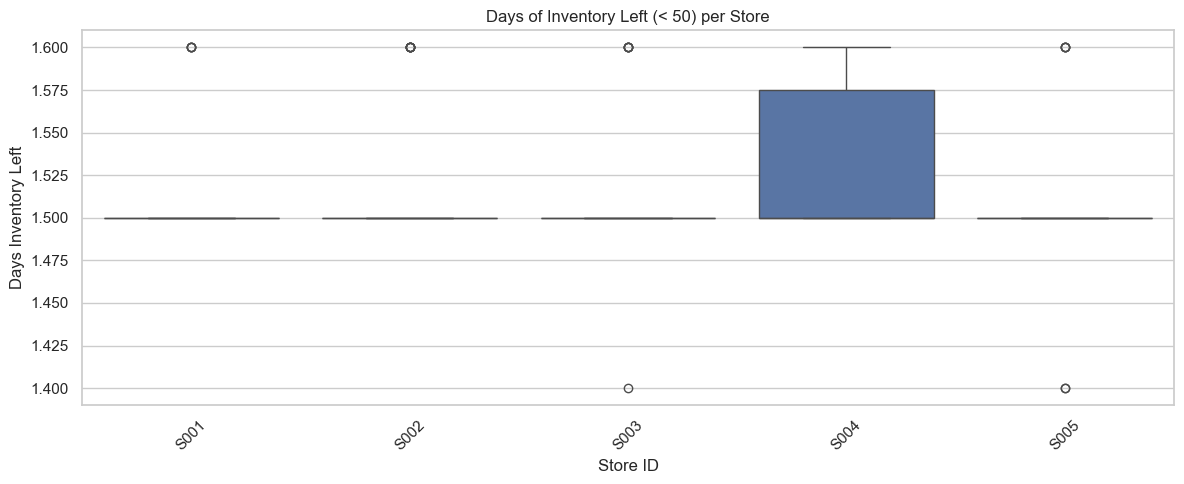

In [59]:
filtered = vw_days_inventory_left[vw_days_inventory_left['days_inventory_left'] < 50]

plt.figure(figsize=(12, 5))
sns.boxplot(data=filtered, x='store_id', y='days_inventory_left')
plt.title('Days of Inventory Left (< 50) per Store')
plt.xlabel('Store ID')
plt.ylabel('Days Inventory Left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Load all view exports.
fact_inventory = pd.read_csv("../exports/fact_inventory.csv")
vw_inventory_gap = pd.read_csv("../exports/vw_inventory_gap.csv")
vw_low_accuracy_stores = pd.read_csv("../exports/vw_low_accuracy_stores.csv")
vw_days_inventory_left = pd.read_csv("../exports/vw_days_inventory_left.csv")
vw_overstock_analysis = pd.read_csv("../exports/vw_overstock_analysis.csv")
vw_seasonal_performance = pd.read_csv("../exports/vw_seasonal_performance.csv")
vw_region_demand_gap = pd.read_csv("../exports/vw_region_demand_gap.csv")

In [61]:
import pandas as pd

fact_inventory = pd.read_csv("../exports/fact_inventory.csv", delimiter=';')
fact_inventory.columns = fact_inventory.columns.str.strip().str.replace('"', '')  
fact_inventory.head()

,date,store_id,product_id,region,inventory_level,units_sold,units_ordered,demand_forecast,price,discount,weather_condition,holiday_promotion,competitor_pricing,seasonality
0,2022-01-01,S001,P0016,East,189,127,125,150.47,90.78,0.0,Rainy,0,84.16,Winter
1,2022-01-01,S001,P0017,South,70,64,68,92.68,40.64,0.0,Cloudy,0,36.99,Winter
2,2022-01-01,S001,P0031,West,75,48,39,68.62,13.99,20.0,Rainy,0,12.67,Winter
3,2022-01-01,S001,P0046,South,139,117,110,128.42,64.72,5.0,Rainy,0,67.55,Winter
4,2022-01-01,S001,P0057,East,142,115,112,118.46,63.14,10.0,Snowy,0,61.15,Winter


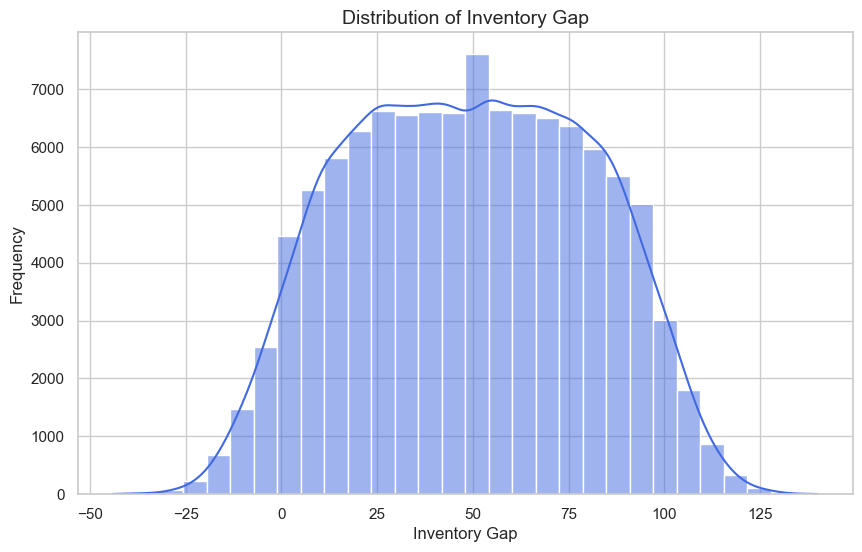

In [62]:
# Calculate inventory gap if not present
if 'inventory_gap' not in fact_inventory.columns:
    fact_inventory['inventory_gap'] = fact_inventory['inventory_level'] - fact_inventory['units_sold']

plt.figure(figsize=(10,6))
sns.histplot(fact_inventory['inventory_gap'], bins=30, kde=True, color='royalblue')
plt.title("Distribution of Inventory Gap", fontsize=14)
plt.xlabel("Inventory Gap")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [63]:
vw_inventory_gap = pd.read_csv("../exports/vw_inventory_gap.csv", delimiter=';')
vw_inventory_gap.columns = vw_inventory_gap.columns.str.strip().str.replace('"', '')
print(vw_inventory_gap.columns.tolist())  

['product_id', 'store_id', 'avg_inventory', 'avg_demand', 'inventory_gap']


In [64]:
import plotly.express as px

fig = px.bar(
    vw_inventory_gap,
    x='store_id',
    y='inventory_gap',
    title='Average Inventory Gap by Store',
    labels={'store_id': 'Store ID', 'inventory_gap': 'Avg Inventory Gap'},
    color='inventory_gap',
    color_continuous_scale='Blues'
)
fig.show()

In [65]:
vw_days_inventory_left = pd.read_csv("../exports/vw_days_inventory_left.csv", delimiter=';')
vw_days_inventory_left.columns = vw_days_inventory_left.columns.str.strip().str.replace('"', '')
print(vw_days_inventory_left.columns.tolist())

['store_id', 'product_id', 'days_inventory_left']


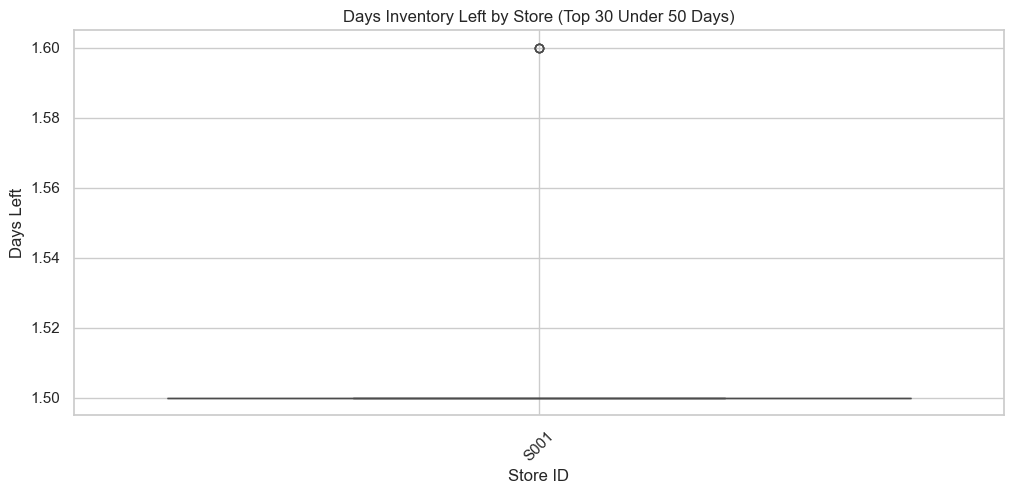

In [66]:
# Clean column names
vw_days_inventory_left.columns = vw_days_inventory_left.columns.str.replace('"', '').str.strip()

# Filter top 30 entries with inventory days < 50 for visibility
filtered = vw_days_inventory_left[vw_days_inventory_left['days_inventory_left'] < 50].head(30)

plt.figure(figsize=(12, 5))
sns.boxplot(data=filtered, x='store_id', y='days_inventory_left')
plt.title("Days Inventory Left by Store (Top 30 Under 50 Days)")
plt.xticks(rotation=45)
plt.ylabel("Days Left")
plt.xlabel("Store ID")
plt.grid(True)
plt.show()

In [67]:
vw_overstock_analysis = pd.read_csv("../exports/vw_overstock_analysis.csv", delimiter=';', engine='python')
# Split the single header column
# Clean quotes and whitespace from column names
vw_overstock_analysis.columns = vw_overstock_analysis.columns.str.strip().str.replace('"', '')

In [68]:
print(vw_overstock_analysis.columns.tolist())

['product_id', 'store_id', 'avg_inventory', 'avg_demand', 'inventory_gap']


In [69]:
vw_overstock_analysis['avg_inventory'] = vw_overstock_analysis['avg_inventory'].astype(float)
vw_overstock_analysis['avg_demand'] = vw_overstock_analysis['avg_demand'].astype(float)

vw_overstock_analysis['overstock_units'] = vw_overstock_analysis['avg_inventory'] - vw_overstock_analysis['avg_demand']

import plotly.express as px

fig = px.bar(
    vw_overstock_analysis.sort_values(by='overstock_units', ascending=False).head(15),
    x='product_id',
    y='overstock_units',
    title='Top 15 Overstocked Products',
    labels={'product_id': 'Product ID', 'overstock_units': 'Overstock Units'},
    color='overstock_units',
    color_continuous_scale='YlOrRd'
)
fig.show()

In [70]:
# Load the forecast accuracy view exported as CSV
import pandas as pd

vw_forecast_accuracy = pd.read_csv("../exports/vw_forecast_accuracy.csv", delimiter=';')
vw_forecast_accuracy.columns = vw_forecast_accuracy.columns.str.strip().str.replace('"', '')

/var/folders/1_/1hb976217pv_csmcsddyxdwr0000gn/T/ipykernel_47653/1076949017.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




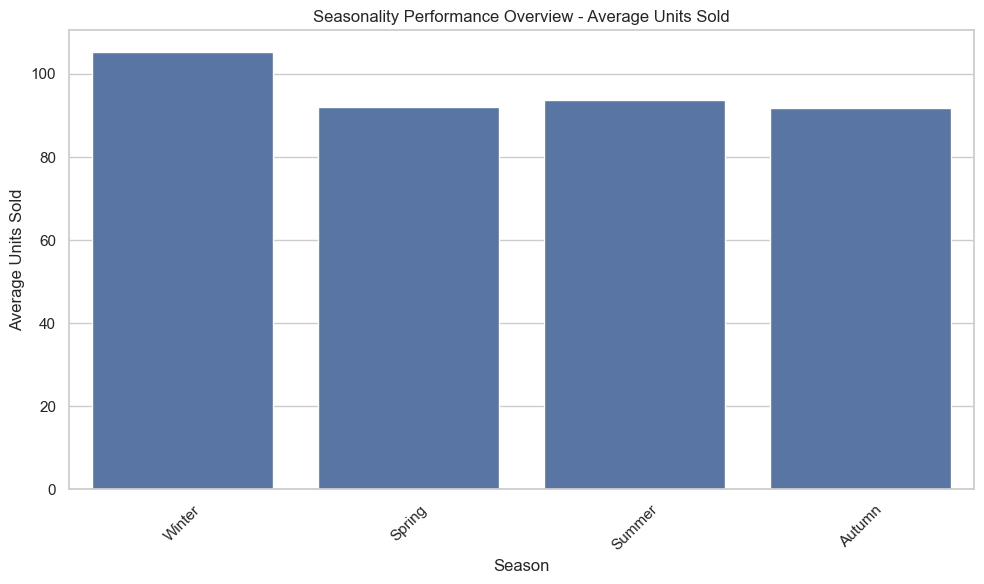

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=fact_inventory, x='seasonality', y='units_sold', estimator='mean', ci=None)
plt.title("Seasonality Performance Overview - Average Units Sold")
plt.xlabel("Season")
plt.ylabel("Average Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
import pandas as pd
import plotly.express as px

# Load the CSV
vw_region_demand_gap = pd.read_csv("../exports/vw_region_demand_gap.csv", delimiter=';')
vw_region_demand_gap.columns = vw_region_demand_gap.columns.str.strip().str.replace('"', '')

# Plot with correct column
fig = px.bar(
    vw_region_demand_gap,
    x='region',
    y='demand_supply_gap',  
    title='Demand Gap Across Regions',
    labels={'region': 'Region', 'demand_supply_gap': 'Demand Gap'},  
    color='demand_supply_gap',
    color_continuous_scale='Purples'
)
fig.show()

In [91]:
# Check if view data is empty
if vw_low_accuracy_stores.empty:
    print("⚠️ No low accuracy stores found. Skipping this visualization.")
else:
    fig = px.bar(
        vw_low_accuracy_stores.sort_values(by='avg_forecast_error', ascending=False),
        x='store_id',
        y='avg_forecast_error',
        title='Stores with Lowest Forecast Accuracy',
        labels={'store_id': 'Store ID', 'avg_forecast_error': 'Forecast Error'},
        color='avg_forecast_error',
        color_continuous_scale='Reds'
    )
    fig.show()

⚠️ No low accuracy stores found. Skipping this visualization.


In [87]:
# Create forecast error if not already available
fact_inventory['forecast_error'] = abs(fact_inventory['demand_forecast'] - fact_inventory['units_sold'])

In [88]:
# Group by store and calculate average forecast error
store_forecast_error = fact_inventory.groupby('store_id')['forecast_error'].mean().reset_index()
store_forecast_error.columns = ['store_id', 'avg_forecast_error']

In [89]:
import plotly.express as px

fig = px.bar(
    store_forecast_error.sort_values(by='avg_forecast_error', ascending=False).head(10),
    x='store_id',
    y='avg_forecast_error',
    title='Top 10 Stores with Lowest Forecast Accuracy',
    labels={'store_id': 'Store ID', 'avg_forecast_error': 'Avg Forecast Error'},
    color='avg_forecast_error',
    color_continuous_scale='Reds'
)
fig.show()

###  Reorder Point Calculation (Assumed Category-wise Lead Time)

In [73]:
dim_product = pd.read_csv("../exports/dim_product.csv", delimiter=';', engine='python')
dim_product.columns = dim_product.columns.str.strip().str.replace('"', '')
print(dim_product.columns.tolist())  

['product_id', 'category']


In [74]:
fact_inventory = pd.merge(
    fact_inventory,
    dim_product[['product_id', 'category']],
    on='product_id',
    how='left'
)

In [75]:
lead_times = {
    'Furniture': 5,
    'Electronics': 3,
    'Clothing': 2,
    'Toys': 4,
    'Others': 3
}

fact_inventory['lead_time'] = fact_inventory['category'].map(lead_times)

In [76]:
print(fact_inventory[['product_id', 'category', 'lead_time']].head())

  product_id     category  lead_time
0      P0016     Clothing        2.0
1      P0017         Toys        4.0
2      P0031  Electronics        3.0
3      P0046     Clothing        2.0
4      P0057     Clothing        2.0


In [77]:
# Define assumed lead times for each product category
lead_times = {
    'Furniture': 5,
    'Electronics': 3,
    'Clothing': 2,
    'Toys': 4,
    'Grocery': 1
}

# Map lead time based on the category column
fact_inventory['lead_time'] = fact_inventory['category'].map(lead_times)


print("Missing lead times for categories:")
print(fact_inventory[fact_inventory['lead_time'].isna()]['category'].unique())

Missing lead times for categories:
['Groceries']


In [78]:
# Calculate average daily demand per product
daily_demand = fact_inventory.groupby('product_id')['units_sold'].mean().reset_index()
daily_demand.columns = ['product_id', 'avg_daily_demand']

# Merge it back to the main DataFrame
fact_inventory = pd.merge(fact_inventory, daily_demand, on='product_id', how='left')

In [79]:
# Step 1: Calculate avg daily demand
avg_demand = (
    fact_inventory
    .groupby('product_id', as_index=False)['units_sold']
    .mean()
    .rename(columns={'units_sold': 'avg_daily_demand'})
)

In [80]:
print(avg_demand.head())

  product_id  avg_daily_demand
0      P0016        105.344932
1      P0017         93.600000
2      P0031         88.423562
3      P0046        105.973973
4      P0057        106.084658


In [81]:
lead_times = {
    'Furniture': 5,
    'Electronics': 3,
    'Clothing': 4,
    'Toys': 2
}
fact_inventory['lead_time'] = fact_inventory['category'].map(lead_times)

In [82]:
# Load product category data
dim_product = pd.read_csv("../exports/dim_product.csv", delimiter=';')
dim_product.columns = dim_product.columns.str.strip().str.replace('"', '')

# Merge category into main table
fact_inventory = pd.merge(fact_inventory, dim_product[['product_id', 'category']], on='product_id', how='left')

In [83]:
fact_inventory['reorder_point'] = (fact_inventory['avg_daily_demand'] * fact_inventory['lead_time']).round(2)

In [84]:
# Step 0: Load dim_product with proper columns
dim_product = pd.read_csv("../exports/dim_product.csv", delimiter=';')
dim_product.columns = dim_product.columns.str.strip().str.replace('"', '')

# Step 1: Merge category into main inventory data
fact_inventory = pd.merge(fact_inventory, dim_product[['product_id', 'category']], on='product_id', how='left')

In [85]:
fact_inventory[['product_id', 'category', 'avg_daily_demand', 'lead_time', 'reorder_point']].drop_duplicates().head(10)

,product_id,category,avg_daily_demand,lead_time,reorder_point
0,P0016,Clothing,105.344932,4.0,421.38
1,P0017,Toys,93.600000,2.0,187.20
2,P0031,Electronics,88.423562,3.0,265.27
3,P0046,Clothing,105.973973,4.0,423.90
4,P0057,Clothing,106.084658,4.0,424.34
5,P0061,Clothing,105.388493,4.0,421.55
6,P0066,Clothing,105.414795,4.0,421.66
7,P0067,Furniture,93.234521,5.0,466.17
8,P0068,Electronics,87.032329,3.0,261.10
9,P0069,Clothing,104.922740,4.0,419.69


/var/folders/1_/1hb976217pv_csmcsddyxdwr0000gn/T/ipykernel_47653/3434102547.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




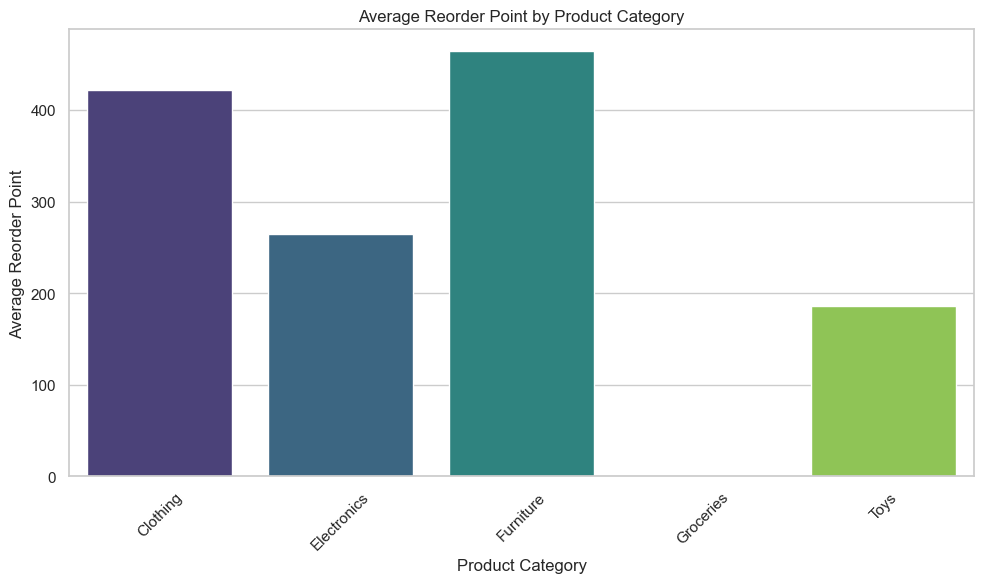

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and average reorder points by category
reorder_summary = fact_inventory.groupby('category')['reorder_point'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=reorder_summary, x='category', y='reorder_point', palette='viridis')
plt.title("Average Reorder Point by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Reorder Point")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()